In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/aravi/Documents/CAPSTONE/Videogames Analysis/Cleaned_VideoGamesSales.csv')
# df=df[df.duplicated()]
df=df.drop_duplicates()
df['Region']=df['Region'].fillna('North')
df['NA_Sales']=df['NA_Sales'].replace('[$]','',regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce')
Average_Sales=df['NA_Sales'].mean()
Average_Sales=int(Average_Sales)
df['NA_Sales']=df['NA_Sales'].fillna(Average_Sales)

df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title()
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})

sales_cap = df['National Sales'].quantile(0.95)
df['National Sales'] = np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales'])
df

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,2.07,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,2.07,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,2.07,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5889,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5890,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5891,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


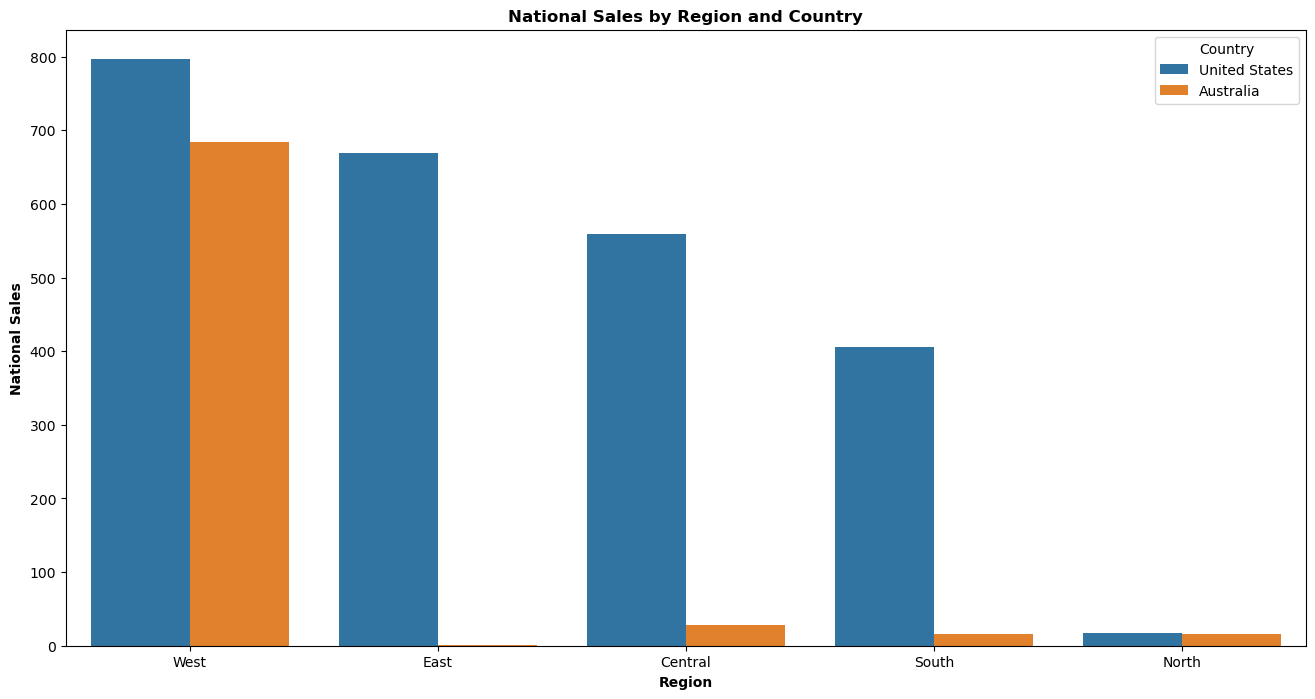

In [9]:
#create a bar Chart

National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales
plt.figure(figsize=(16, 8))
sns.barplot(data=National_Sales, x='Region', y='National Sales',hue='Country')
plt.title('National Sales by Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

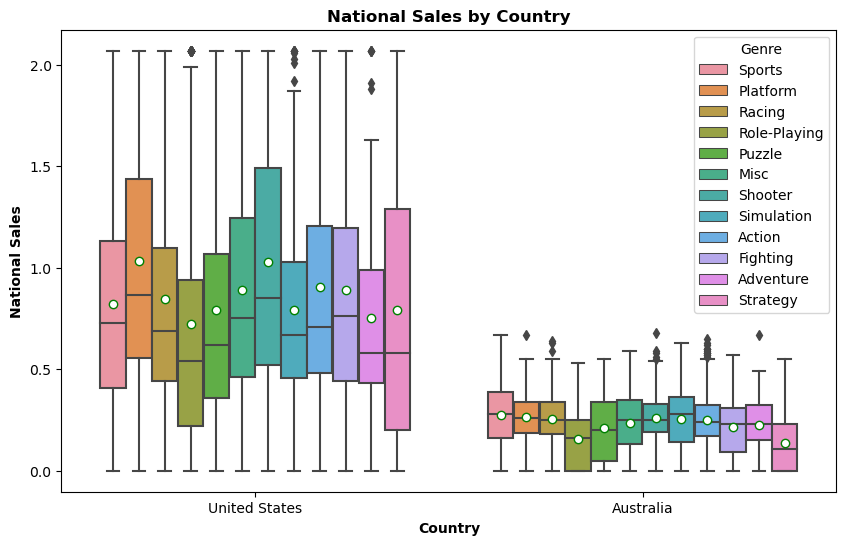

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='National Sales', data=df,showmeans=True,hue='Genre',meanprops={"marker":"o"
                                                                                   ,"markerfacecolor":"white"
                                                                                   ,"markersize":"6"
                                                                                 ,"markeredgecolor":"green"})

plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

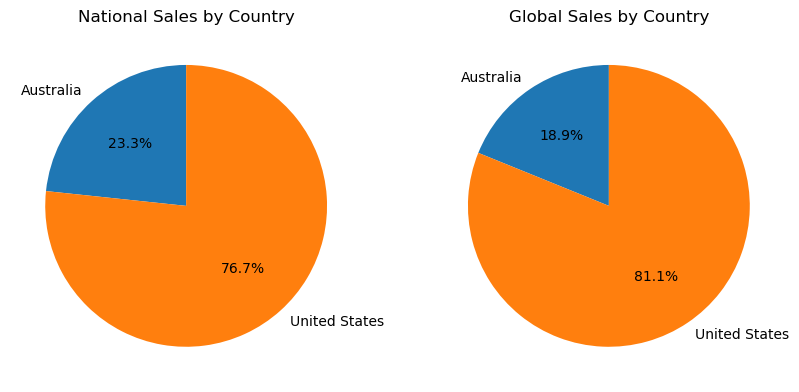

In [13]:
#create a pie Chart
Sales=df.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
Country=Sales['Country']
National_Sales=Sales['National Sales']
Global_Sales=Sales['Global Sales']

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Global Sales by Country')

plt.show()



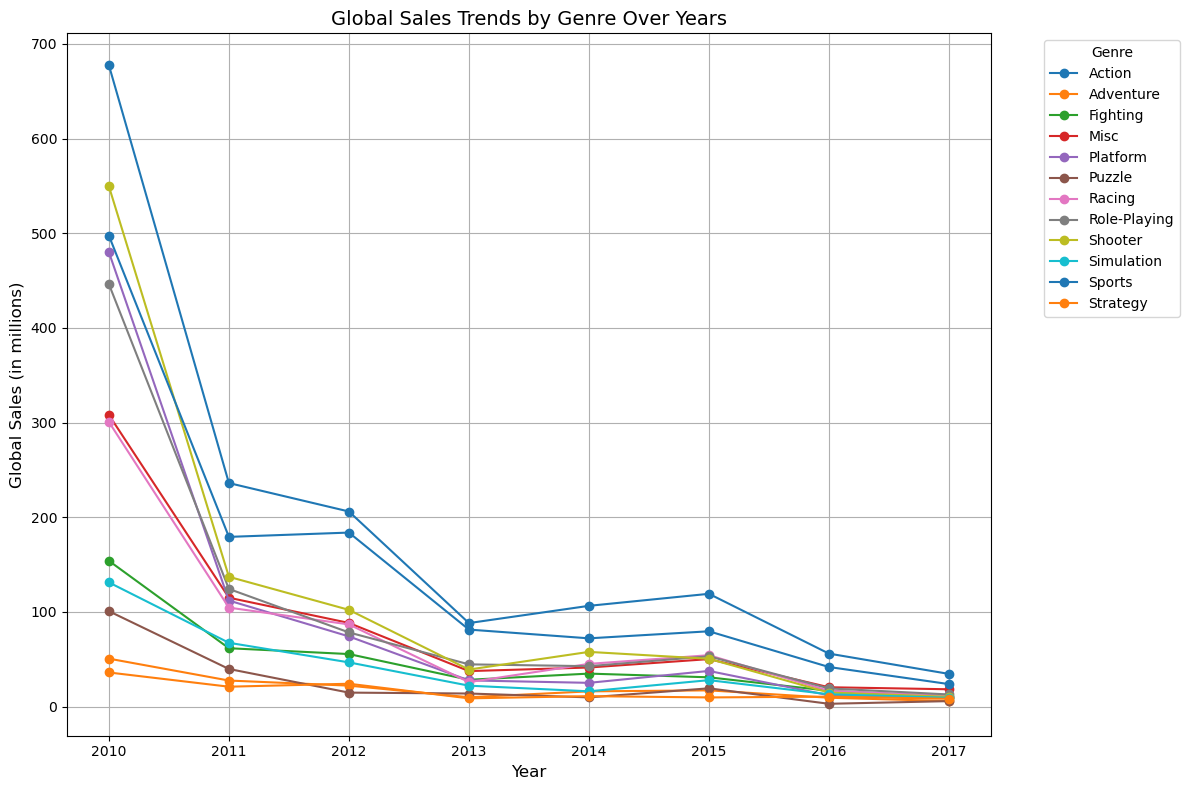

In [21]:
# Aggregate the data by Genre and Year for Global Sales
sales_by_genre_year = df.groupby(['Year', 'Genre'])['Global Sales'].sum().reset_index()

# Pivot the data for plotting
sales_pivot = sales_by_genre_year.pivot(index='Year', columns='Genre', values='Global Sales')

# Plot the line chart
plt.figure(figsize=(12, 8))
for genre in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[genre], marker='o', label=genre)

plt.title('Global Sales Trends by Genre Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True)
plt.tight_layout()
plt.show()